# Aufgabe 1)

In [13]:
import sympy as sp
import numpy as np

def fsim(x):
    return sp.exp(x**2) + x ** -3 - 10

x = sp.Symbol('x')
df = sp.diff(fsim(x))
print(df)


2*x*exp(x**2) - 3/x**4


Lösung: $f'(x) = 2x*e^{(x^2)} - 3/x^4 = 0$

########## Newon-Verfahren ##########
[2.         1.79504077 1.62508169 1.53077013 1.50862932 1.50763883]
########## Newton-Simple-Verfahren ##########
[0.5        0.48467388 0.48570052 0.48556445 0.4855819  0.48557965]
########## Sekantenverfahren ##########
[-1.         -1.2        -1.86101512 -1.3494176  -1.4326421  -1.55938972]


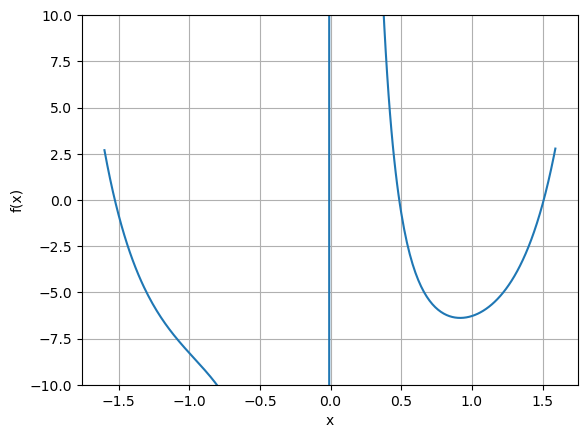

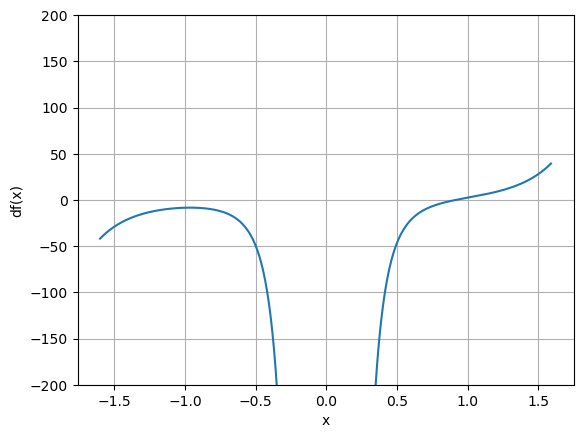

In [67]:
def f(x):
    return np.exp(x**2) + x**-3 - 10


def df(x):
    return 2 * x * np.exp(x**2) - 3 / x**4


# Newton-Verfahren
def newton(f, df, x0, n):
    x = np.zeros(n + 1)
    x[0] = x0
    for i in range(1, n + 1):
        x[i] = x[i - 1] - f(x[i - 1]) / df(x[i - 1])
    return x


def newton_simple(f, dfx0, x0, n):
    x = np.zeros(n + 1)
    x[0] = x0
    for i in range(1, n + 1):
        x[i] = x[i - 1] - f(x[i - 1]) / dfx0
    return x


def sekanten(f, x0, x1, n):
    x = np.zeros(n + 1)
    x[0] = x0
    x[1] = x1
    for i in range(2, n + 1):
        xn = x[i - 1]
        xn_1 = x[i - 2]
        x[i] = xn -( ((xn - xn_1)) / (f(xn) - f(xn_1)) )*f(xn)
    return x


print("########## Newon-Verfahren ##########")
print(newton(f, df, 2, 5))
print("########## Newton-Simple-Verfahren ##########")
print(newton_simple(f, df(0.5), 0.5, 5))
print("########## Sekantenverfahren ##########")
print(sekanten(f, -1.0, -1.2, 5))

import matplotlib.pyplot as plt

x = np.arange(-1.6,1.6,0.01)
y1 = f(x)
y2 = df(x)

plt.figure(1)
plt.plot(x, y1), plt.xlabel("x"), plt.ylabel("f(x)"), plt.grid(), plt.ylim(-10, 10)
plt.figure(2)
plt.plot(x, y2), plt.xlabel("x"), plt.ylabel("df(x)"), plt.grid(),  plt.ylim(-200, 200)

plt.show()

# 2) Kugelvolumen

In [73]:
def vsim(h):
    return ((sp.pi * h**2) / 6) * (30 - 2 * h) - 471 


x = sp.Symbol("h")
df = sp.diff(vsim(x))
print(sp.latex(sp.expand(sp.simplify(df))))

- \pi h^{2} + 10 \pi h


Ableitung: $- \frac{\pi h^{2}}{3} + \frac{\pi h \left(30 - 2 h\right)}{3}$

$\pi h \left(10 - h\right)$

$- \pi h^{2} + 10 \pi h$

[9.         7.65821738 8.01487653 8.03707968]


([<matplotlib.lines.Line2D at 0x7fabe49c7110>],
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'df(x)'),
 None)

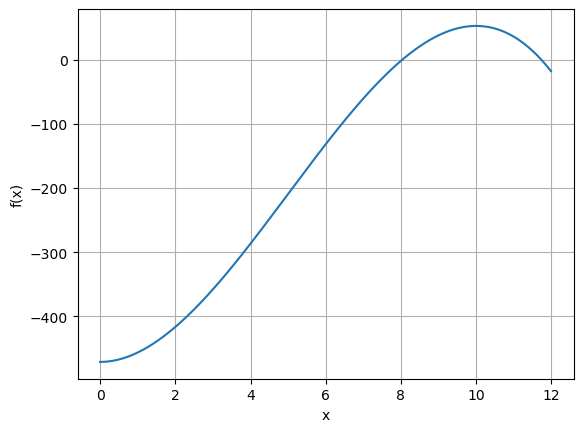

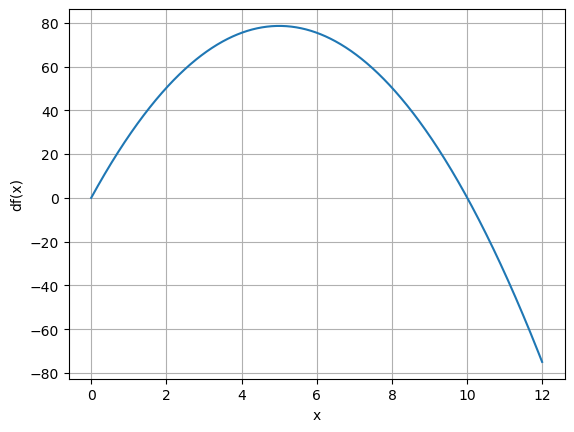

In [79]:
absoluter_fehler = 10e-3


def v(h):
    return ((np.pi * h**2) / 6) * (3 * 10 - 2 * h) - 471


def vdf(h):
    return -np.pi * h**2 + 10 * np.pi * h
    # return -np.pi*h**2/3 + np.pi*h*(30 - 2*h)/3


x = np.arange(0, 10, 0.01)


def newton_lim(f, df, x0, n, lim, tol):
    x = np.zeros(n + 1)
    x[0] = x0
    for i in range(1, n + 1):
        if lim > f(x[i - 1] - tol) * f(x[i - 1] + tol):
            return x[:i]
        x[i] = x[i - 1] - f(x[i - 1]) / df(x[i - 1])
    return x




print(newton_lim(v, vdf, 9, 5, 0, absoluter_fehler))

x = np.arange(0, 12, 0.01)
y = v(x)
y1 = vdf(x)
plt.figure(1)
plt.plot(x, y), plt.xlabel("x"), plt.ylabel("f(x)"), plt.grid()  # , plt.ylim(-10, 10)
plt.figure(2)
plt.plot(x, y1), plt.xlabel("x"), plt.ylabel(
    "df(x)"
), plt.grid()  # ,  plt.ylim(-200, 200)

# Aufgabe 3) 